# 2024-11-28 목요일

# Markdown
## **여전히 멋대로 쓰고 있는 마크다운 복습**

### TIL 마크다운 작성 가이드

1. 큰 주제별로 # 사용
   1. 가장 큰 주제를 #로 사용한다. 예를 들어, 날짜, 수업, 회고 등이 큰 주제가 될 수 있음.
   2. 큰 주제는 한 문서 안에서 최대 1~3개로 제한하는 것이 좋다.
   

2. 중간 구분은 ##로 세분화
   1. **##는 큰 주제의 하위 주제**를 구분할 때 사용
   2. 예를 들어, "베이직반: 오늘의 파이썬" 아래에 문제 풀이를 나누고 싶다면 각 문제 풀이를 ##로 나눌 수 있음

3. 상세 내용은 ###로 세분화
   1. 상세한 설명, 예를 들어 코드 풀이, ChatGPT의 답변, 또는 회고의 세부 내용을 작성할 때 ### 또는 ####를 사용한다.
   2. ###는 설명 제목을, ####는 해당 내용의 세부 항목으로 사용한다.

- 이를 바탕으로 20241118_TIL 수정 진행중 


## **Markdown All in One** 
- To do list를 체크박스로 관리하고 체크박스 클릭으로 상태 변경을 위해 찾아본 확장인데, 생각보다 더 편리한 기능들이 많아보인다.
- 근데 이거 쓰려면 문서를 .md로 만들어야 한다. (마크다운 형식으로)


# Checkbox
## 체크박스에 대한 집착

### 요구사항: VSCode에서 마우스로 클릭이 되는 체크박스를 만들고싶어요.
### 왜? TIL 쓰면서 To do list를 관리하고 싶음

**방법1:** HTML과 JavaScript 사용하기

Jupyter Notebook의 Markdown 셀에서 HTML과 JavaScript를 활용하여 체크박스를 클릭 가능한 형태로 구현할 수 있음

**결과:** 
- 체크박스가 나타나며, 마우스 클릭으로 상태를 변경할 수 있음
- 상태 변경은 브라우저 상에서 동작하지만 Jupyter Notebook에 데이터로는 저장되지는 않음

<script>
  function toggleCheckbox(id) {
    const checkbox = document.getElementById(id);
    checkbox.checked = !checkbox.checked;
  }
</script>

<input type="checkbox" id="task1" onclick="toggleCheckbox('task1')"> 할 일 1<br>
<input type="checkbox" id="task2" onclick="toggleCheckbox('task2')" checked> 완료된 일

**방법2:** ipywideget 사용 (추천)

Python 코드 셀에서 ipywidgets를 사용하여 체크박스를 만들고 상태를 동적으로 관리할 수 있음

ipywidegets을 설치해야함

In [1]:
from ipywidgets import Checkbox, VBox, interact

# 체크박스 생성
task1 = Checkbox(value=False, description='할 일 1')
task2 = Checkbox(value=True, description='완료된 일')

# 체크박스 표시
display(VBox([task1, task2]))

# 체크박스 상태 출력 함수
def show_status():
    print(f"할 일 1 상태: {'완료' if task1.value else '미완료'}")
    print(f"완료된 일 상태: {'완료' if task2.value else '미완료'}")

# 상태 확인
interact(show_status)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.show_status()>

## 체크박스에 대한 집착2
### 요구사항:
- 완료, 진행중, 미완료로 나누고 싶음
- 체크박스를 3번 클릭하면 완료, 진행중, 미완료 상태로 변하고 이걸 단순하게 박스안의 표시로 구분 하고 싶음
- 드롭 다운 X, 그냥 박스 안의 마우스 클릭으로만! 

### 결과
- 박스안의 표시로 구분하는 건 생각보다 어려움. 색으로 구분하는 게 조금 나은 듯 해서 색으로 구분함

In [2]:
from ipywidgets import Button, VBox, Label
from IPython.display import display

# 버튼 스타일 정의
btn_primary = Button(description="Primary", button_style='primary')
btn_success = Button(description="Success", button_style='success')
btn_info = Button(description="Info", button_style='info')
btn_warning = Button(description="Warning", button_style='warning')
btn_danger = Button(description="Danger", button_style='danger')

# 표시
display(VBox([btn_primary, btn_success, btn_info, btn_warning, btn_danger]))

### ipywidgets의 공식 문서
https://ipywidgets.readthedocs.io/en/stable/

In [3]:
from ipywidgets import Button, Label, HBox, Layout
from IPython.display import display

# 상태 정의
states = ['미완료', '진행 중', '완료']
state_styles = {
    '미완료': {'button_color': 'white', 'border_color': 'black'},
    '진행 중': {'button_color': '#F6D175', 'border_color': '#F59E4B'},
    '완료': {'button_color': '#388136', 'border_color': '#0E4D22'}
}

# 초기 상태
current_state = [0]  # 상태 인덱스

# 체크박스 모양의 버튼 생성
checkbox = Button(
    description='',  # 텍스트 없음 (모양만 체크박스)
    layout=Layout(width='13px', height='13px', margin='0px 3px 0px 0px', padding='0px'),  # 크기 및 여백 설정
    style={'button_color': state_styles['미완료']['button_color']}
)

# 상태를 표시할 레이블
state_label = Label(value=f"상태: {states[current_state[0]]}")

# 버튼 스타일 업데이트 함수
def update_checkbox_style():
    style = state_styles[states[current_state[0]]]
    checkbox.style.button_color = style['button_color']
    checkbox.layout.border = f"1px solid {style['border_color']}"  # 테두리 두께 줄임

# 상태 변경 함수
def toggle_state(event):
    # 상태 순환 (0 → 1 → 2 → 0)
    current_state[0] = (current_state[0] + 1) % len(states)
    state_label.value = f"상태: {states[current_state[0]]}"  # 상태 텍스트 변경
    update_checkbox_style()  # 버튼 스타일 업데이트

# 버튼 클릭 이벤트 연결
checkbox.on_click(toggle_state)

# 초기 스타일 설정
update_checkbox_style()

# HBox를 사용하여 버튼과 텍스트를 수평 가운데 정렬
container = HBox([checkbox, state_label], layout=Layout(align_items='center'))

# 화면 표시
display(container)

## 체크박스에 대한 집착3
### 변경 사항
#### 텍스트 뒤에 (완료) (미완료) (진행중)이 뜨도록 바꿈
#### 모듈로 만듬
TIL_by_Day 에 모듈 폴더를 하나 만들어서 거기에 넣어놨음

아래는 구현 예시

### 아쉬운점
  1. 상태유지는 또 다른 문제긴 한데.. 껐다 켜면 상태 유지가 되진 않음. 근데 내가 상태 유지를 원했던 건 아니라서 내가 원하는 기능은 일단 다 구현을 했음

In [1]:
from modules.TaskCheckbox import TaskCheckbox  # TIL_by_Day 폴더 내 modules에서 import

# 할 일 추가
task1 = TaskCheckbox("오늘의 파이썬 문제풀이하기")
task2 = TaskCheckbox("데이터 분석 과제 제출하기")
task3 = TaskCheckbox("AI 논문 읽기")

# 각 할 일 표시
task1.display()
task2.display()
task3.display()

#### 기껏 만들었는데 Git에서 안보이니까 좀 아쉬워서..

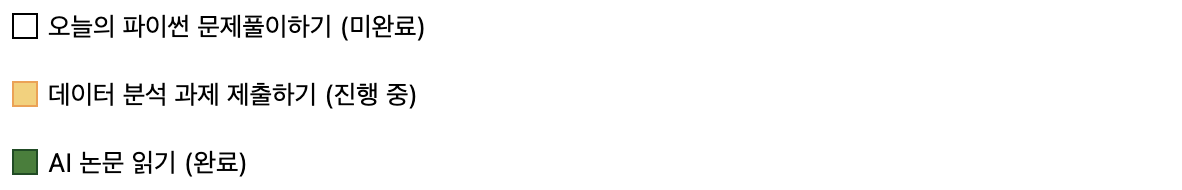

In [2]:
from IPython.display import Image, display

# 이미지 표시
image_path = "Screenshot 2024-11-29.png"
display(Image(filename=image_path))

# 방법론
프로젝트 관리와 작업 진행에 접근하는 두 가지 주요 방법론에 대해 설명한다.

## 1. Waterfall 방식
### 개념
- 단계별 순차적으로 진행되는 프로젝트 관리 방법론이다.
- 각 단계가 끝난 후 다음 단계로 넘어가며, 한 번 완료된 단계는 되돌리기 어렵다.

### 특징
- **고정된 계획:** 프로젝트 시작 전에 전체 계획과 요구사항이 명확히 정의됨
- **순차적 진행:** 각 단계 (요구사항 분석 -> 설계 -> 구현 -> 테스트 -> 배포)가 끝나야 다음 단계로 넘어감
- **문서 중심:** 각 단계에서 문서화가 중요하며, 명확한 기록을 남김

### 장점
- **명확한 구조:** 단계별로 진행되기 때문에 체계적이고 예측 가능
- **관리 용이:** 진행 상태와 일정 관리가 비교적 쉬움
- **문서화:** 프로젝트 종료 후에도 명확한 기록이 남아 유지보수에 유리

### 단점
- **변화에 취약:** 프로젝트 중간에 요구사항이 변경되면 수정이 어렵고 비용이 증가
- **긴 개발 주기:** 최종 결과물이 늦게 나오므로 고객 피드백 반영이 어려움
- **리스크 관리 어려움:** 프로젝트 후반부에야 결과물을 확인할 수 있어 큰 문제가 발견되면 대응이 어려움

### 적합한 경우
- 요구사항이 처음부터 명확하고 변경 가능성이 낮은 경우
- 개발 과정이 복잡하고, 문서화가 필수적인 경우
- 규제나 법률에 따라 체계적인 문서 기록이 필요한 경우 (예: 의료, 건설 프로젝트)

## 2. Agile 방식
### 개념 
- 유연하고 반복적인(iterative) 방식으로, 변화하는 요구사항에 신속히 대응하며 작업을 진행함
- 고객과 팀원 간의 협업을 강조하고, 작은 단위의 결과물을 지속적으로 전달함

### 특징
- **짧은 반복 주기**: 작업을 작은 단위(스프린트)로 나누어 반복적으로 진행
- **지속적인 피드백**: 결과물을 자주 고객에게 보여주고 피드백을 반영
- **유연성:** 프로젝트 진행중에도 요구사항 변경 가능
- **팀 중심:** 팀원 간의 긴밀한 소통과 협업을 중시

### 장점
- **변화에 대한 유연성:** 고객 요구사항 변경에 신속히 대응 가능
- **빠른 결과물 제공:** 짧은 주기마다 사용 가능한 결과물을 제공
- **높은 품질:** 지속적인 테스트와 피드백으로 품질을 보장

### 단점
- **계획의 불확실성:** 초기 단계에서 전체 일정과 예산을 정확히 예측하기 어려움
- **팀 의존도 높음:** 팀워크와 협업이 원활하지 않으면 효과가 떨어짐
- **문서 부족 가능성:** 문서화가 부족하면 장기적인 유지보수에 불리할 수 있음

### 적합한 경우
- 요구사항이 자주 바뀌거나 처음부터 명확하지 않은 경우
- 빠른 결과물 제공과 고객 피드백이 중요한 경우
- 소규모 팀에서 빠른 의사결정과 유연한 작업이 필요한 경우(예: 스타트업, 소프트웨어 개발)

# 베이직반:오늘의 문법
2024년 11월 28일 목요일 베이직반:오늘의 문법 수업 내용 중 일부를 기록합니다.

## 자료 위치
 1. Original: 베이직 반 노션 [과제:오늘의문법], [강의자료]-> [11월 28일 강의교안 찾기]
 2. My Mac: 맥북 파인더에서 오늘의문법 폴더 검색

## print()


# 회고
## 회고1
'Agline 하게 일하는 법'을 배우고 있는 'Waterfall 방식의 나' 인건지 어떻게 일을 하고 있는 건지도 모르겠다. 

근데 연구라는게 Agile하게 되기 쉽지 않은 것 같기도 하다. 되는게 있고 안되는게 있는거 같단 생각. 

내 상황에 맞는 활용 법은 Waterfall 방식의 장점을 활용해서 Agile 요소를 도입하는 것이다. 

즉, 연구 과정이 체계적이어야 하므로, 주요 실험 단계나 논문 작성 과정은 Waterfall 방식을 활용해 계획하고 관리하고 

Agile하게 실험이나 분석 중간중간 결과를 검토하고, 상황 변화에 따라 계획을 유연하게 수정하면 좋을 것 같다.

## 회고2
체크박스에 대한 집착으로, 결국 클릭을 3번 해서 상태가 변하는 체크박스를 만들었다. GPT를 잔뜩 때려서 만든거라 아직 공부 필요함. 

코드가 10번도 넘게 바꼈다. 이걸 직접 구현할 실력이 될 때 까지 달려본다. 

이것도 어려운데 LLM 챗봇은 어떻게 ..... 만들지..? 

내 스스로 한건... GPT 때리기랑 컬러 고르기 밖에 못했는데...
